In [1]:
#%matplotlib inline
#interactive mode
%matplotlib notebook 
from matplotlib.pyplot import *
import numpy as np
import nvaSq
import nvaGr_20211202 as nvaGr
import Manyo as m
r=m.NeXusFileIO()

 ***  Read run numbers 
No of runs: 4
sample 000766 0.0
empty 000738 0.0
vanadium 000773 0.0
cell 000782 0.0
 ***  Sample info read from  ./000766.in
 *** Sample cross sections
[['D', 0.6671, 2.05, 0.0002883, 0.75], ['Al', 0.3449, 0.0082, 0.1283, 0.25]]
 *** Standard Sample cross sections
[['V', -0.03824, 5.08, 2.822, 1.0]]
 **  Read Raw data from ElementContainerArray 
***** Getting proton number from the MLF proton server !
9705340.0 433857.0 6606280.0 3249240.0

##Pix No.=1/1##
 **  x-axis changed to Wavelength, Lambda 
 **  Normalizaiton with proton numbers
       sample:  9705340.0   emtpy:  433857.0   vanadium : 6606280.0
       cell:  3249240.0
 **  Empty background subtraction
       Keys:  lamda,Intensity,Error
 **  V-rod peak cut
 **  Set ttheta so as to be the average of merged pixels
 **  Attenuation factor calculation of cylindrical geometry
 **  Apply atten factor to sample & cell 
       Keys:  lamda,Intensity,Error
       Keys:  lamda,Intensity,Error
 **  Cell subtracti

<IPython.core.display.Javascript object>


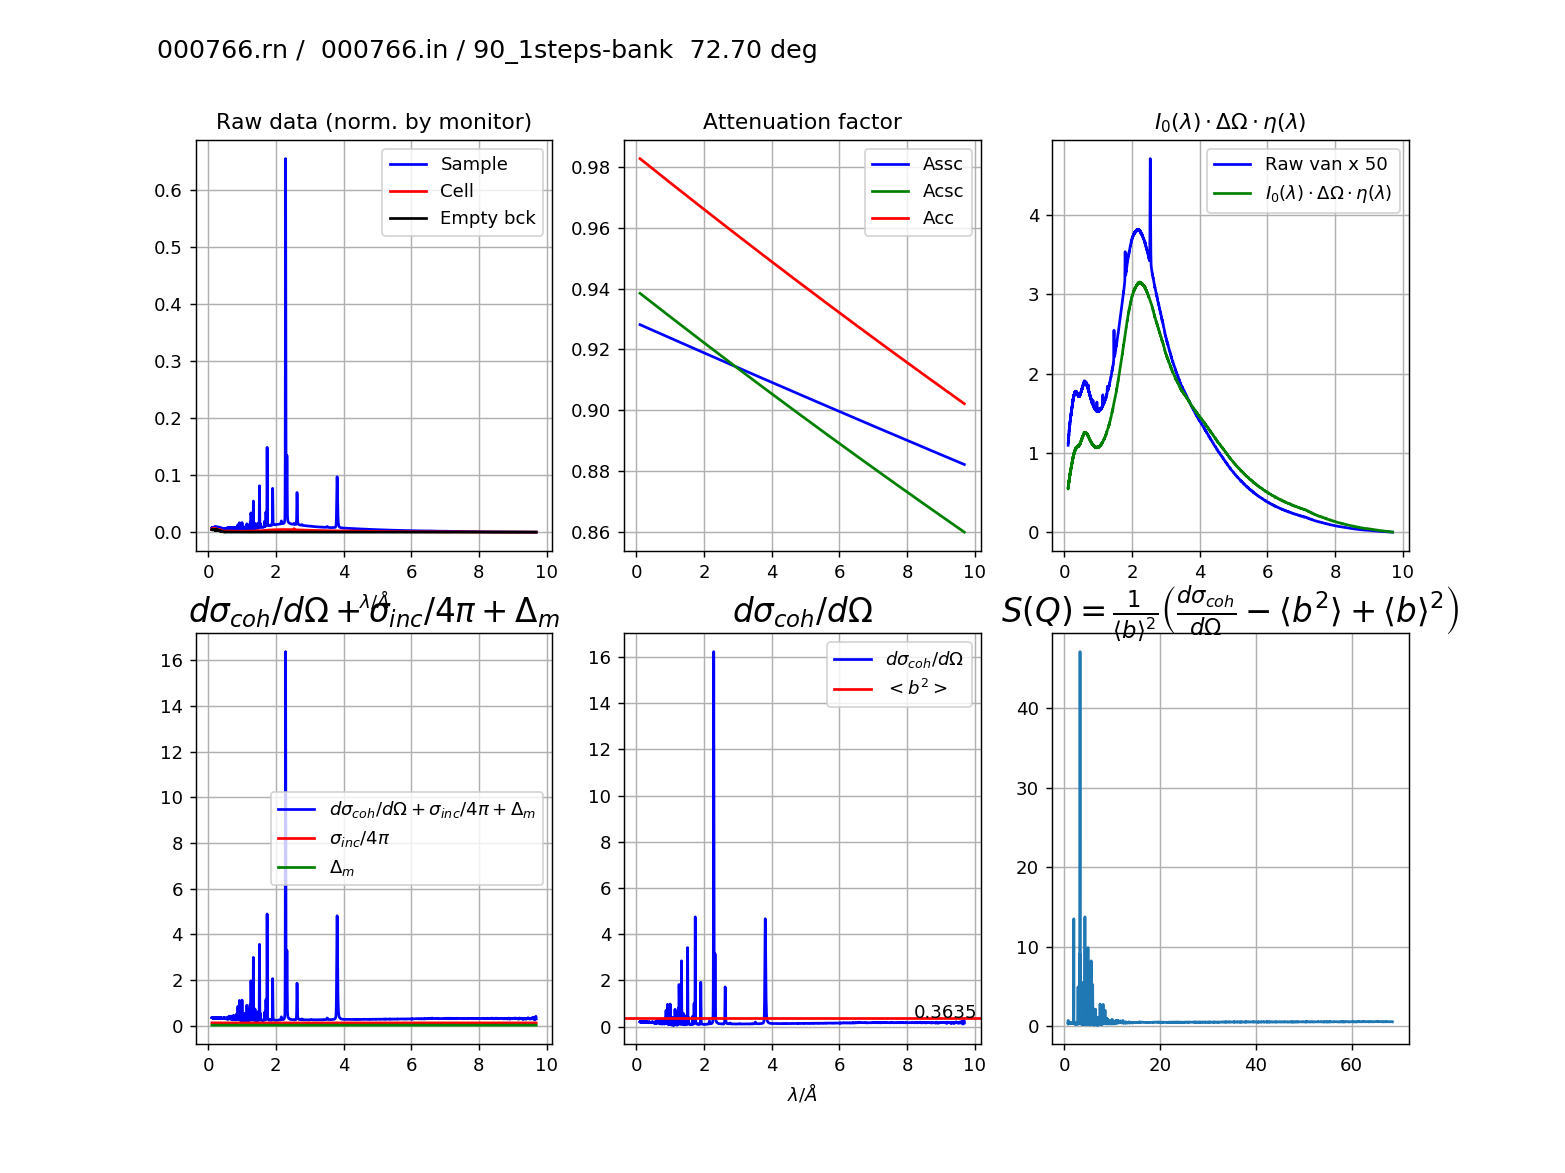

 --- Save const-dQ S(Q) text data ---
      file name:  ./000766_sq_90_1steps.txt


In [2]:
dd = nvaSq.basic("./", "000766.rn", "000766.in", "90_1steps")

In [3]:
bd = nvaGr.Baseline(dd(0), [20.0, 60.0], 1.0, "sq")

In [4]:
bd.PolyFit()

<IPython.core.display.Javascript object>


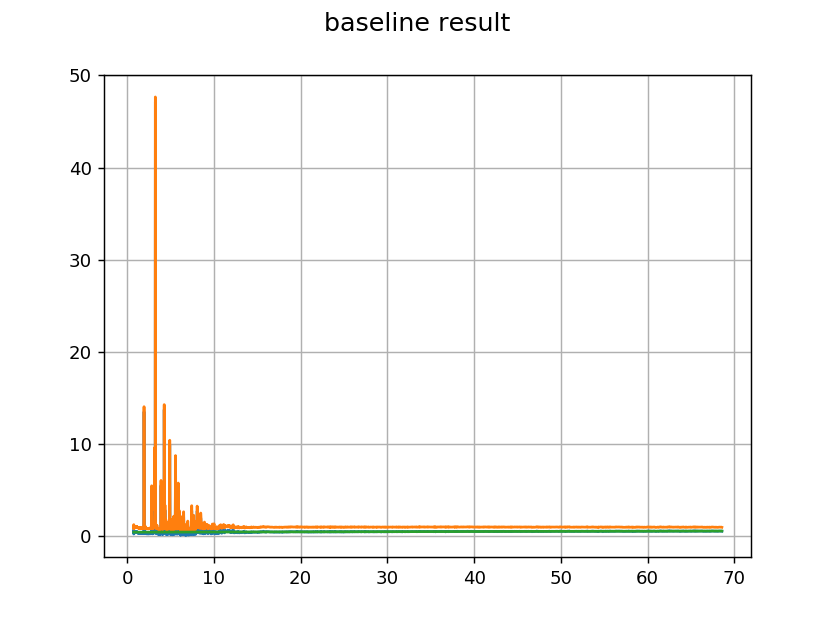

In [5]:
bd.PlotFit()

In [6]:
bd.OutputSQ()

Output baseline corrected data to original ElementContainer


In [7]:
#fbd = nvaGr.FT(bd, 0.11969)
fbd = nvaGr.FT(bd, 0.09)

no of density atoms/angstrom^3:  0.09
modification functoin:  0


In [8]:
fbd.mod_number = 1

no of density  atoms/angstrom^3:  0.09
rmax of g(r):  50.0
delta-r of g(r):  0.01
modification function:  1
nonzero 0 4486
Q-range of S(Q) data 0.768293634837 to 68.5486184261
Qmin & Qmax for FT: 0.900736968724 30.0100278188
Q index min & max: 159 3663


<IPython.core.display.Javascript object>


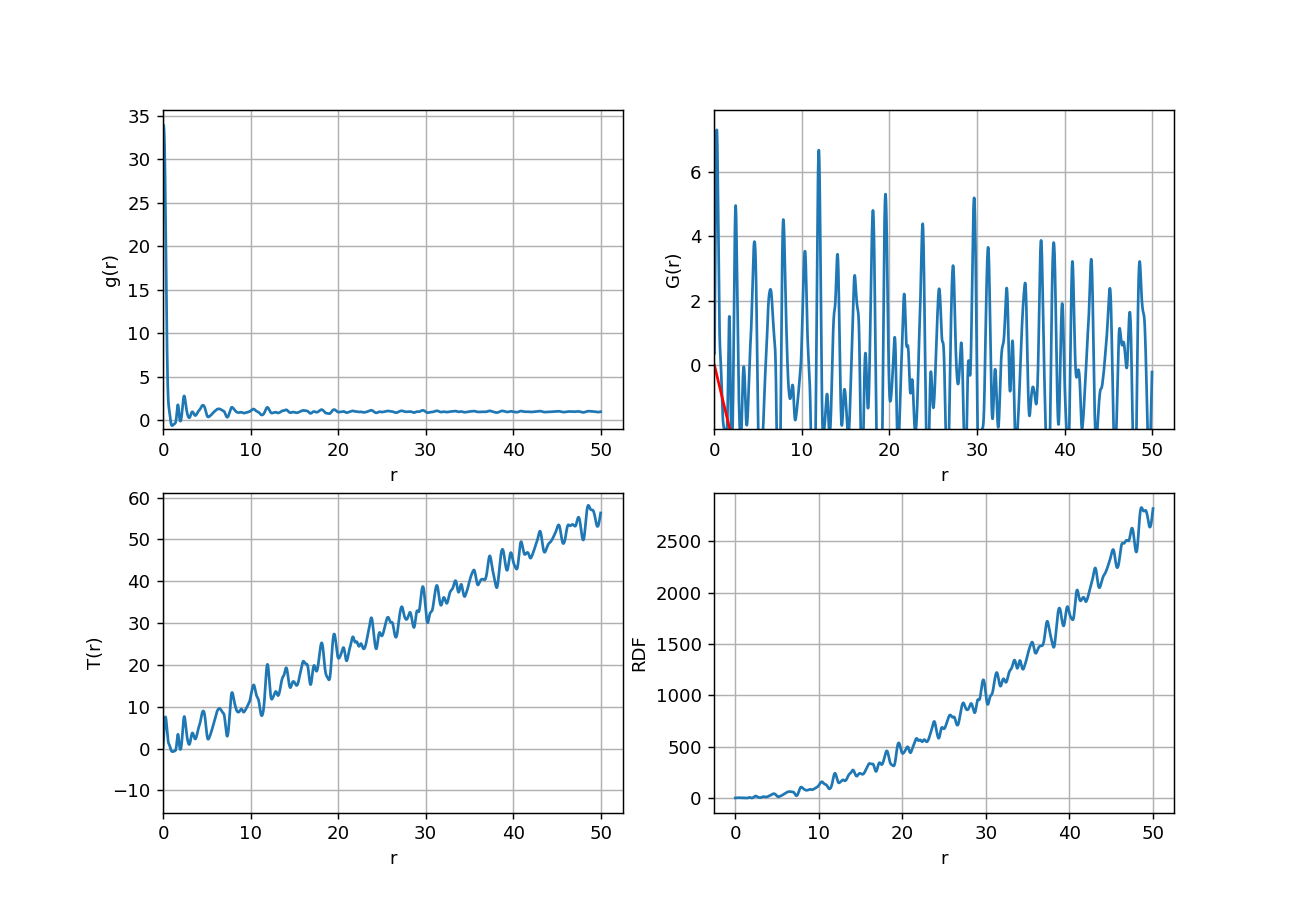

In [9]:
fbd.CalcPDF(50.0, 0.01, 0.9, 30.0)

Make g(r) = 0.0 at r <= 1.3
Inverse Fourer Transforming
Smoothing of difference between original of inverese FT S(Q)


<IPython.core.display.Javascript object>


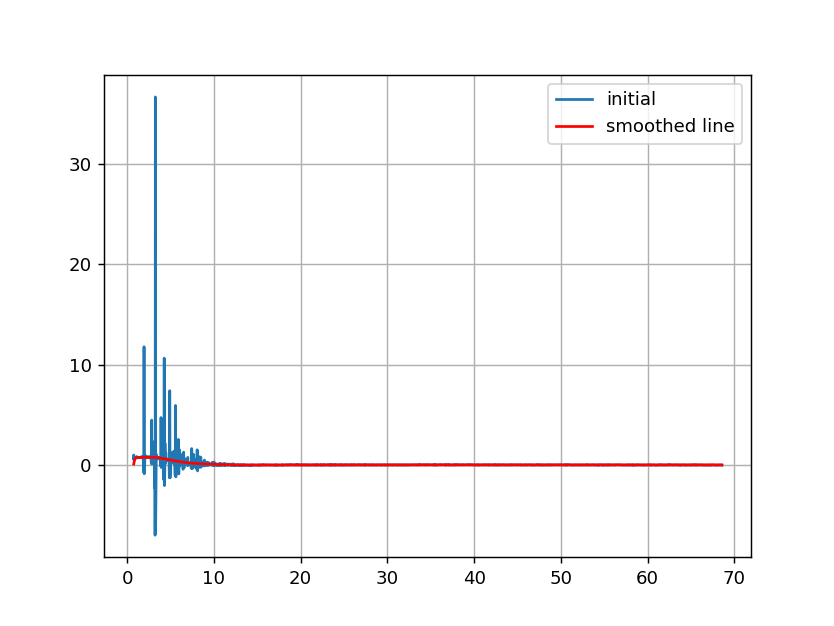

<IPython.core.display.Javascript object>


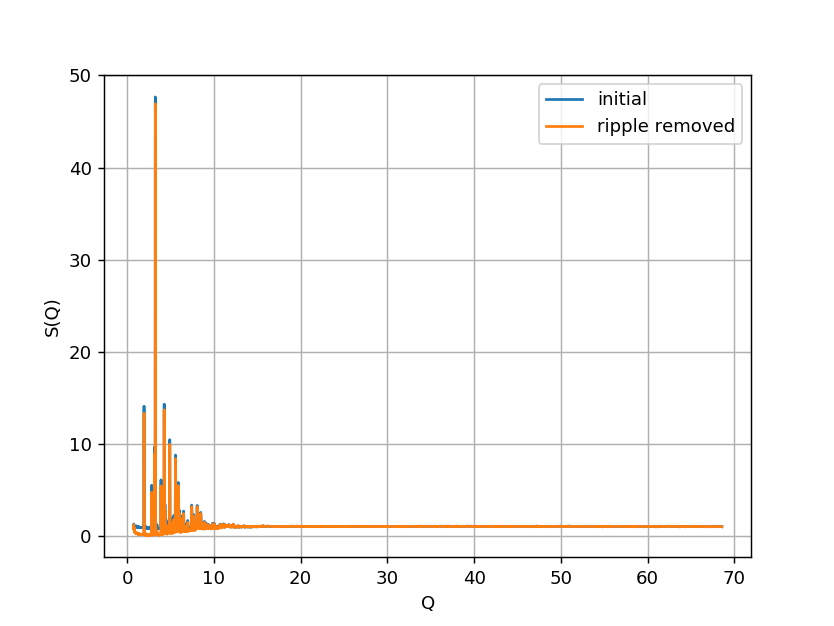

In [10]:
fbd.RemoveRipplegr(1.3, 100)


no of density  atoms/angstrom^3:  0.09
rmax of g(r):  50.0
delta-r of g(r):  0.01
modification function:  1
nonzero 0 4486
Q-range of S(Q) data 0.768293634837 to 68.5486184261
Qmin & Qmax for FT: 0.900736968724 30.0100278188
Q index min & max: 159 3663


<IPython.core.display.Javascript object>


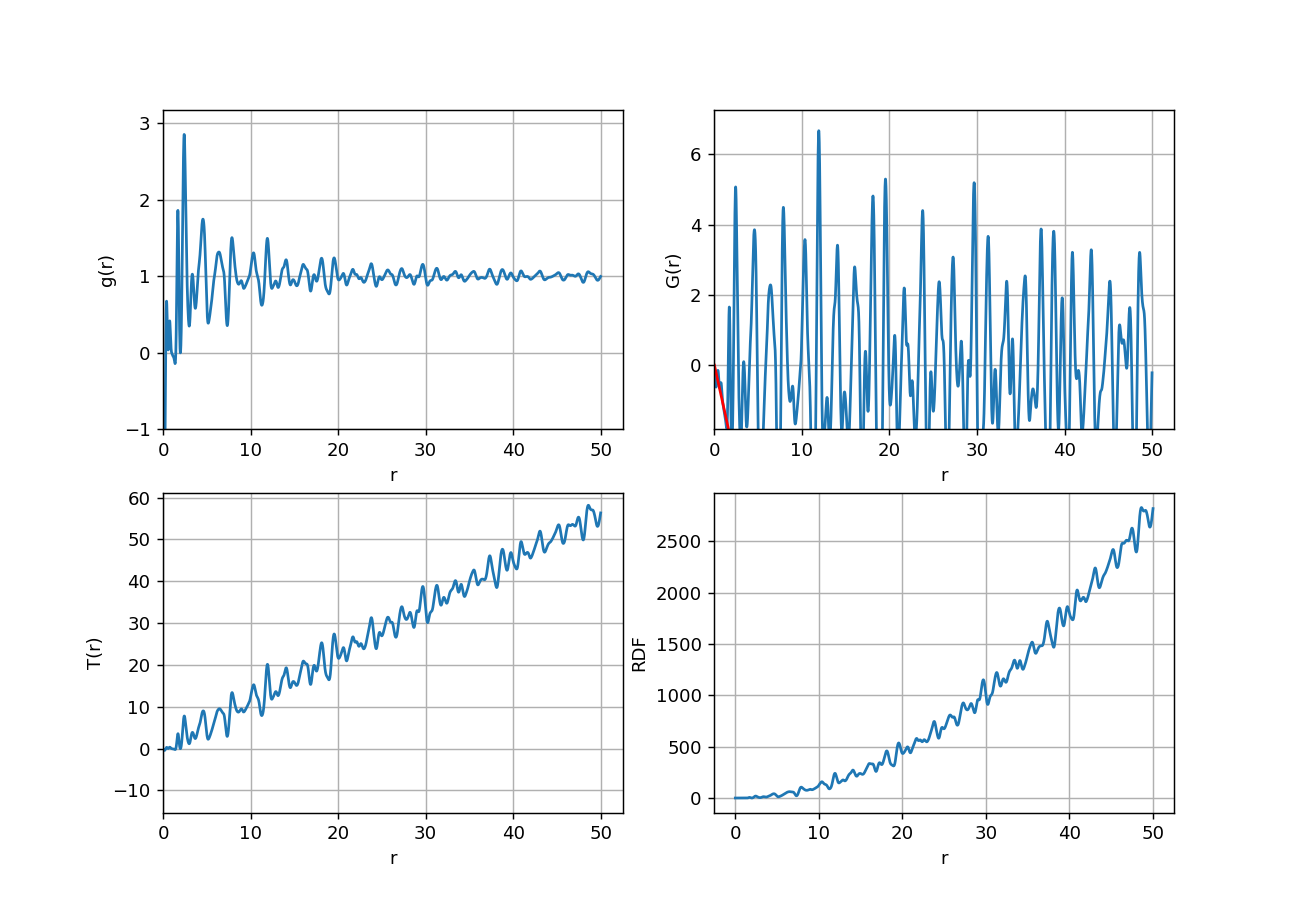

In [11]:
fbd.CalcPDF(50.0, 0.01, 0.9, 30.0)

Make g(r) = 0.0 at r <= 1.3
Inverse Fourer Transforming
Smoothing of difference between original of inverese FT S(Q)


<IPython.core.display.Javascript object>


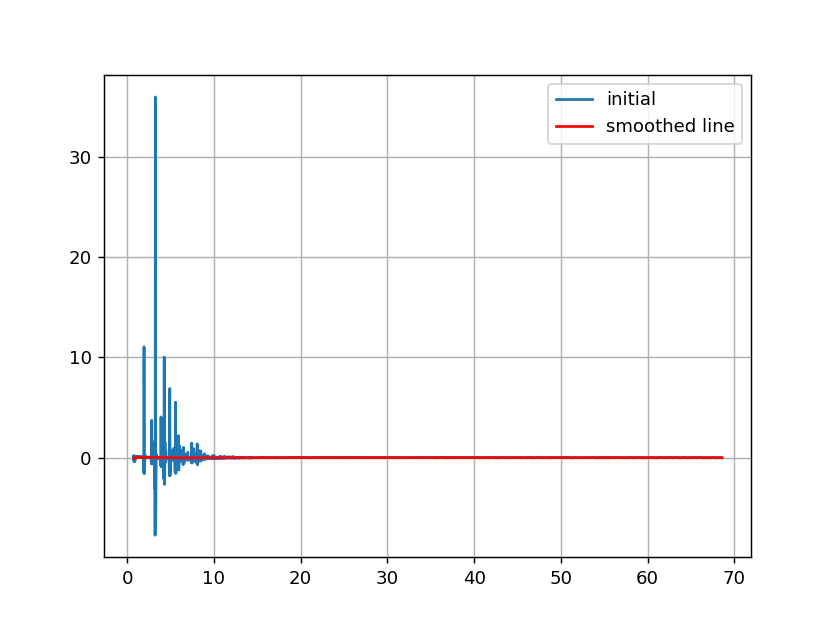

<IPython.core.display.Javascript object>


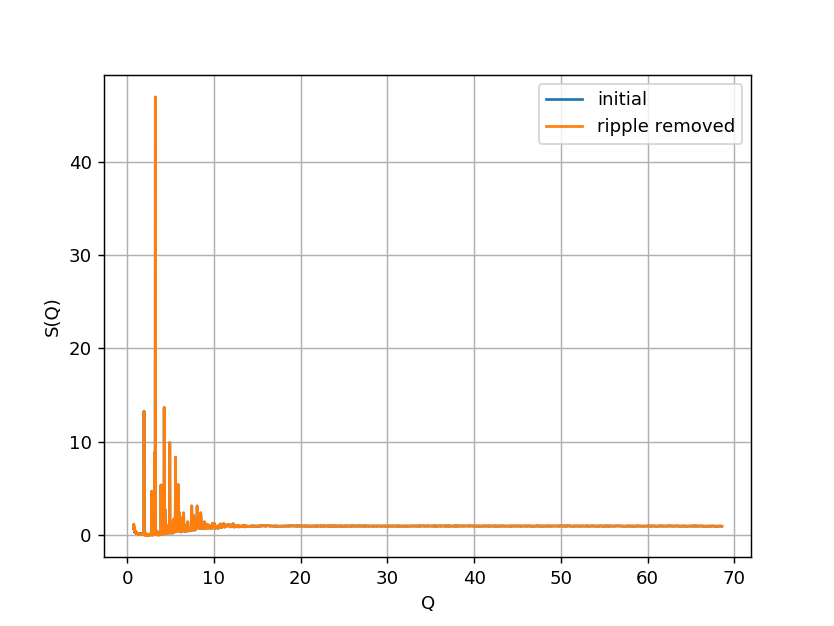

In [12]:
fbd.RemoveRipplegr(1.3, 100)

no of density  atoms/angstrom^3:  0.09
rmax of g(r):  50.0
delta-r of g(r):  0.02
modification function:  1
nonzero 0 4486
Q-range of S(Q) data 0.768293634837 to 68.5486184261
Qmin & Qmax for FT: 0.900736968724 30.0100278188
Q index min & max: 159 3663


<IPython.core.display.Javascript object>


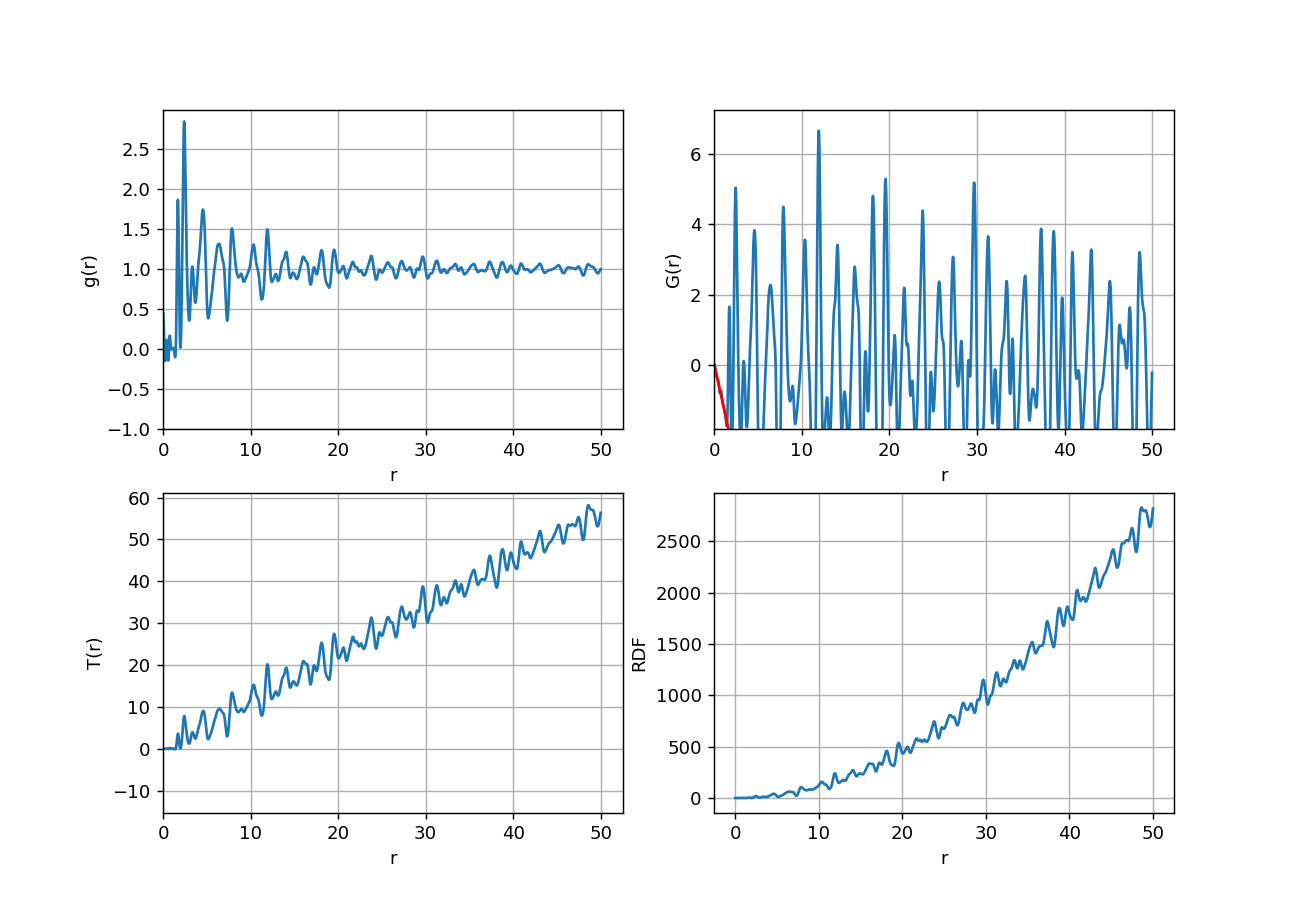

In [13]:
fbd.CalcPDF(50.0, 0.02, 0.9, 30.0)

In [14]:
fbd.CutLowR(1.3)

In [15]:
#fbd.Output("017788_sq_90_bcs01_rr027_009300.txt")

In [16]:
fbd.OutputForPDFgui("766_sq_90_pdf.txt")

 --- Save r G(r) delta-r delta-G(r) in PDFgui format ---
      file name:  766_sq_90_pdf.txt


In [17]:
fbd.OutputForRMCgr("766_sq_90_gr.txt")

 --- Save g(r) G(r) T(r) RDF forRMCprof text data ---
      file name:  766_sq_90_gr.txt
